In [1]:
import pandas as pd
import numpy as np

# For data visualization 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# 1. Importing Datasets 

In [2]:
#120OlympicHistory_AthletesResults
athlete_events = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/athlete_events.csv')
regions = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/noc_regions.csv')
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 2. Data Exploration - 120 Olympic History

2.1 Exploring athlete_events dataset

In [3]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


2.2 Exploring regions dataset


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 3. Merging  athlete_events and regions datasets


3.1 Merging dataset to get a combined set of athlete events and regions.
Complete dataset name "athlete_dataset"

In [6]:
athlete_dataset = pd.merge(athlete_events, regions, on = "NOC", how = "left")
athlete_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


3.2 Exploring complete dataset

In [7]:
athlete_dataset["Year"].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [8]:
athlete_dataset["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan',
       'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon',
       'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka',
       'Armenia', 'Ivory

In [9]:
# create a dataframe filtered by Russia

Russia_df=athlete_dataset[(athlete_dataset['NOC'] == 'RUS') | (athlete_dataset['NOC'] == 'URS')|(athlete_dataset['NOC'] == 'EUN')]
Russia_df=Russia_df.sort_values(["Year"], ascending=True)
Russia_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
51650,26553,lie de Polyakov,M,NaN,NaN,NaN,Russia,RUS,1900 Summer,1900,Summer,Paris,Equestrianism,Equestrianism Mixed Hacks And Hunter Combined,NaN,Russia,NaN
178035,89463,Vladimir Nikolayevich Orlov,M,31.0,NaN,NaN,Russia-1,RUS,1900 Summer,1900,Summer,Paris,Equestrianism,Equestrianism Mixed Four-In-Hand Competition,NaN,Russia,NaN
158114,79383,Yulian Aleksandrovich Michaux,M,NaN,NaN,NaN,Russia,RUS,1900 Summer,1900,Summer,Paris,Fencing,"Fencing Men's Sabre, Masters, Individual",NaN,Russia,NaN
267457,133807,Pyotr Antonovich Zakovorot,M,NaN,NaN,NaN,Russia,RUS,1900 Summer,1900,Summer,Paris,Fencing,"Fencing Men's Sabre, Masters, Individual",NaN,Russia,NaN
51651,26553,lie de Polyakov,M,NaN,NaN,NaN,Russia-1,RUS,1900 Summer,1900,Summer,Paris,Equestrianism,Equestrianism Mixed Four-In-Hand Competition,NaN,Russia,NaN


In [10]:
# Filter to year 1952-2012
RussiaSorted_df=Russia_df[(Russia_df["Year"]<2011)& (Russia_df["Year"]>1951)]
RussiaSorted_df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
25876,13502,Vladimir Fyodorovich Borisenko,M,NaN,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Russia,NaN
25883,13506,Igor Andreyevich Borisov,M,28.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Rowing,Rowing Men's Coxed Eights,Silver,Russia,NaN
112289,56862,Yekaterina Illarionovna Kalinchuk (Dyomina-),F,29.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Horse Vault,Gold,Russia,NaN
112291,56862,Yekaterina Illarionovna Kalinchuk (Dyomina-),F,29.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Balance Beam,NaN,Russia,NaN
112290,56862,Yekaterina Illarionovna Kalinchuk (Dyomina-),F,29.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Uneven Bars,NaN,Russia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129831,65366,Mikhail Sergeyevich Kuzmich,M,27.0,185.0,86.0,Russia-2,RUS,2010 Winter,2010,Winter,Vancouver,Luge,Luge Mixed (Men)'s Doubles,NaN,Russia,NaN
218496,109742,Yekaterina Vladimirovna Shikhova,F,24.0,172.0,63.0,Russia,RUS,2010 Winter,2010,Winter,Vancouver,Speed Skating,Speed Skating Women's Team Pursuit (6 laps),NaN,Russia,NaN
141366,70941,Yekaterina Aleksandrovna Lobysheva,F,24.0,178.0,69.0,Russia,RUS,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Women's 1,500 metres",NaN,Russia,NaN
194659,97703,Olga Valeryevna Pylyova-Medvedtseva (Zamorozova-),F,34.0,163.0,55.0,Russia,RUS,2010 Winter,2010,Winter,Vancouver,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,Gold,Russia,NaN


In [11]:
#athlete count
grouped_RussiaSorted_df = RussiaSorted_df.groupby(['Year','NOC'])
athlete_count = grouped_RussiaSorted_df ['ID'].count()

#Medal Count
medal_RussiaSorted_df = RussiaSorted_df.loc[(Russia_df['Medal'] != 'No Medal')]
grouped_medal_RussiaSorted_df = medal_RussiaSorted_df .groupby(['Year','NOC'])
medal_count = grouped_medal_RussiaSorted_df['Medal'].count()
#medal_count = grouped_subset_df['Medal'].drop('No Medal').count()

summary_RussiaSorted_df = pd.DataFrame({'Athlete Count' : athlete_count,
                               'Medal Count' :medal_count})
summary_RussiaSorted_df

,,Athlete Count,Medal Count
Year,NOC,,
1952,URS,451,117
1956,URS,492,206
1960,URS,505,211
1964,URS,570,221
1968,URS,592,229
1972,URS,649,259
1976,URS,695,342
1980,URS,789,496
1984,URS,143,56


In [12]:
# Grouped by Unique athleths

Russia_UnqiueAthletesdf= RussiaSorted_df.drop_duplicates(subset=['Name'], keep=False)
Russia_UnqiueAthletesdf
Russia_UnqiueAthletesgender_df= Russia_UnqiueAthletesdf.groupby(['Sex'])
Datagender= Russia_UnqiueAthletesgender_df["Sex"].count()
Datagender

Sex
F     760
M    1859
Name: Sex, dtype: int64

In [13]:
# Plot the gender count by year X- year; y- female vs male
Gender_Year=Russia_UnqiueAthletesdf.groupby(['Year', 'Sex'])['Sex'].count().reset_index(name='count')
pd.DataFrame(Gender_Year)
Gender_Year.head(50)

,Year,Sex,count
0,1952,F,17
1,1952,M,164
2,1956,F,12
3,1956,M,127
4,1960,F,14
5,1960,M,104
6,1964,F,19
7,1964,M,105
8,1968,F,20
9,1968,M,96


In [14]:
# Read in the GDP before and after file
GDP_USSR = pd.read_csv('../Datasets/population_gdp/GDP population before 1990.csv')
GDP_Countries = pd.read_csv('../Datasets/population_gdp/gdp_csv.csv')

GDP_USSRsorted=GDP_USSR.drop(["Population"], axis=1)

GDP_USSRsorted.dropna(how="all",inplace=True)
GDP_USSRsorted.head(100)
GDP_Countries=GDP_Countries.rename(columns={"Value": "GDP"})
GDP_Countries.head()

,Country Name,Country Code,Year,GDP
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


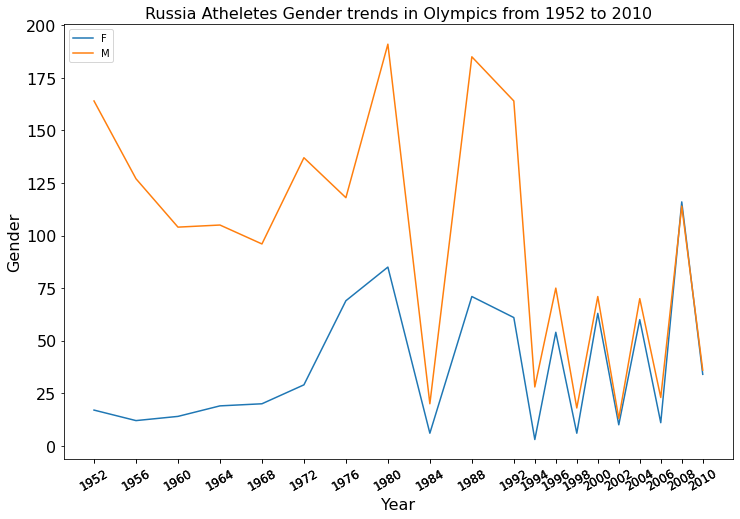

<Figure size 432x288 with 0 Axes>

In [15]:
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x = 'Year', y = 'count', hue = 'Sex', data = Gender_Year)
ax.legend(loc='upper left')

plt.yticks(fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.xticks(Gender_Year['Year'], fontsize=12, rotation=30)
plt.xlabel('Year', fontsize=16)
plt.title('Russia Atheletes Gender trends in Olympics from 1952 to 2010',fontsize=16)
plt.show()
plt.savefig("Russia Atheletes Gender trends.jpg")

In [16]:
#mutiple the USSR GDP by $Million to keep the GDP value consistent
GDP_USSRsorted["GDP"] = GDP_USSRsorted["GDP"].astype(float)
GDP_USSRsorted["GDP"] = 1000000*GDP_USSRsorted["GDP"]
GDP_USSRsorted.head(100)

,Country Name,Country Code,Year,GDP
0,USSR,URS,1915,NaN
1,USSR,URS,1916,NaN
2,USSR,URS,1917,NaN
3,USSR,URS,1918,NaN
4,USSR,URS,1919,NaN
...,...,...,...,...
71,USSR,URS,1986,1.940363e+12
72,USSR,URS,1987,1.965457e+12
73,USSR,URS,1988,2.007280e+12
74,USSR,URS,1989,2.037253e+12


In [17]:
# Merge the two GDP files 
GDP_masterdf=GDP_Countries.append(GDP_USSRsorted)
GDP_masterdf=GDP_masterdf.rename(columns={"Country Code": "NOC"})
GDP_masterdf.head()

,Country Name,NOC,Year,GDP
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [18]:
# filter by Rassia and USSR,year, GDP
GDPyear_df=GDP_masterdf[(GDP_masterdf["Year"]<= 2010)& (GDP_masterdf["Year"]>= 1952)]
GDPyear_df=GDPyear_df[(GDPyear_df['NOC'] == 'RUS') | (GDPyear_df['NOC'] == 'URS')|(GDPyear_df['NOC'] == 'EUN')]
GDPyear_df.sort_values(["Year"], ascending=False)
GDPyear_df.to_csv("GDPbyYearforRussia2")
GDPyear_df.head(100)

,Country Name,NOC,Year,GDP
9180,Russian Federation,RUS,1991,5.179630e+11
9181,Russian Federation,RUS,1992,4.602910e+11
9182,Russian Federation,RUS,1993,4.350840e+11
9183,Russian Federation,RUS,1994,3.950770e+11
9184,Russian Federation,RUS,1995,3.955310e+11
9185,Russian Federation,RUS,1996,3.917200e+11
9186,Russian Federation,RUS,1997,4.049270e+11
9187,Russian Federation,RUS,1998,2.709530e+11
9188,Russian Federation,RUS,1999,1.959060e+11
9189,Russian Federation,RUS,2000,2.597080e+11


No handles with labels found to put in legend.


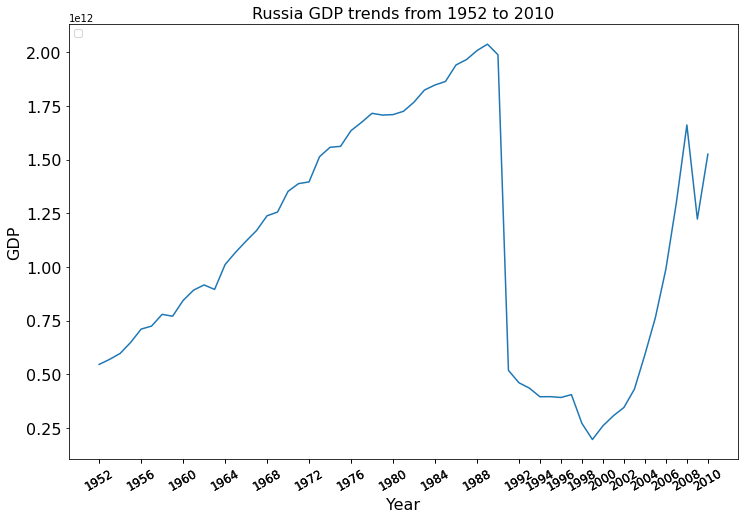

<Figure size 432x288 with 0 Axes>

In [19]:
#plot the year and GDP
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x = 'Year', y = 'GDP', data =GDPyear_df )
ax.legend(loc='upper left')

plt.yticks(fontsize=16)
plt.ylabel('GDP', fontsize=16)
plt.xticks(Gender_Year['Year'], fontsize=12, rotation=30)
plt.xlabel('Year', fontsize=16)
plt.title('Russia GDP trends from 1952 to 2010',fontsize=16)
plt.show()
plt.savefig("Russia GDP trends.jpg")

In [20]:
# Merge dataframe #1 Year and metal #Year and GDP
MetalGDP_df=pd.merge(GDPyear_df,summary_RussiaSorted_df,on="Year", how="outer")
MetalGDP_df=MetalGDP_df.dropna()
MetalGDP_df["GDPmetal ratio"]=MetalGDP_df["GDP"] /MetalGDP_df["Medal Count"]/1000000
MetalGDP_df

,Country Name,NOC,Year,GDP,Athlete Count,Medal Count,GDPmetal ratio
1,Russian Federation,RUS,1992,4.602910e+11,864.0,279.0,1649.788530
3,Russian Federation,RUS,1994,3.950770e+11,208.0,36.0,10974.361111
5,Russian Federation,RUS,1996,3.917200e+11,552.0,115.0,3406.260870
7,Russian Federation,RUS,1998,2.709530e+11,197.0,52.0,5210.634615
9,Russian Federation,RUS,2000,2.597080e+11,602.0,187.0,1388.812834
11,Russian Federation,RUS,2002,3.451100e+11,240.0,38.0,9081.842105
13,Russian Federation,RUS,2004,5.910170e+11,593.0,189.0,3127.074074
15,Russian Federation,RUS,2006,9.899310e+11,283.0,41.0,24144.658537
17,Russian Federation,RUS,2008,1.660840e+12,600.0,142.0,11696.056338
19,Russian Federation,RUS,2010,1.524920e+12,279.0,25.0,60996.800000


The correlation between both factors is 0.43


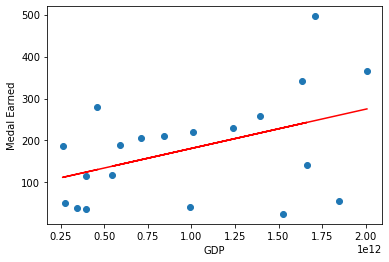

<Figure size 432x288 with 0 Axes>

In [21]:
GDP=MetalGDP_df.iloc[:,3]
MedalCount=MetalGDP_df.iloc[:,5]
correlation = st.pearsonr(GDP,MedalCount)
plt.scatter(GDP,MedalCount)
(slope, intercept, rvalue, pvalue, stderr) = linregress(GDP,MedalCount)
regress_values = GDP * slope + intercept
plt.plot(GDP,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('GDP')
plt.ylabel('Medal Earned')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()
plt.savefig("Russia GDP_Medal earned trends.jpg")
